In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns

from sklearn.preprocessing import StandardScaler

from sklearn.decomposition import PCA

In [2]:
df = pd.read_csv('_RES/train.csv')

In [3]:
df.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1


In [4]:
def create_time_features(df):
    '''
    Taking the datetime object and create new columns for date, year, month, day, weekday, hour
    
    Params
    ------
    
    df: the dataframe that needs to be converted
    '''
    
    df = df.copy()
    df['date'] = pd.to_datetime(df['datetime']).dt.date
    df['year'] = pd.to_datetime(df['datetime']).dt.year
    df['month'] = pd.to_datetime(df['datetime']).dt.month
    df['day'] = pd.to_datetime(df['datetime']).dt.day
    df['hour'] = pd.to_datetime(df['datetime']).dt.hour
    df['weekday'] = pd.to_datetime(df['datetime']).dt.weekday
    return df    

In [5]:
df = create_time_features(df)

In [6]:
df.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,date,year,month,day,hour,weekday
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16,2011-01-01,2011,1,1,0,5
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40,2011-01-01,2011,1,1,1,5
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32,2011-01-01,2011,1,1,2,5
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13,2011-01-01,2011,1,1,3,5
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1,2011-01-01,2011,1,1,4,5


In [7]:
columns_of_interest = ['season', 'holiday', 'workingday', 
                       'weather', 'temp', 'atemp', 'humidity', 'windspeed',
                      'year', 'month', 'day', 'hour', 'weekday']
df = df[columns_of_interest]

In [8]:
bike_PCA_data = df.select_dtypes(np.number)

In [9]:
bike_PCA_data.head()

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,year,month,day,hour,weekday
0,1,0,0,1,9.84,14.395,81,0.0,2011,1,1,0,5
1,1,0,0,1,9.02,13.635,80,0.0,2011,1,1,1,5
2,1,0,0,1,9.02,13.635,80,0.0,2011,1,1,2,5
3,1,0,0,1,9.84,14.395,75,0.0,2011,1,1,3,5
4,1,0,0,1,9.84,14.395,75,0.0,2011,1,1,4,5


In [10]:
scaler = StandardScaler()

In [11]:
bike_PCA_data_scaled = scaler.fit_transform(bike_PCA_data)

In [12]:
bike_PCA_data_scaled

array([[-1.34986372, -0.17149048, -1.46067232, ..., -1.64206967,
        -1.66894356,  0.99079257],
       [-1.34986372, -0.17149048, -1.46067232, ..., -1.64206967,
        -1.52434128,  0.99079257],
       [-1.34986372, -0.17149048, -1.46067232, ..., -1.64206967,
        -1.379739  ,  0.99079257],
       ...,
       [ 1.33801198, -0.17149048,  0.68461625, ...,  1.64478707,
         1.36770431, -0.50584498],
       [ 1.33801198, -0.17149048,  0.68461625, ...,  1.64478707,
         1.51230659, -0.50584498],
       [ 1.33801198, -0.17149048,  0.68461625, ...,  1.64478707,
         1.65690887, -0.50584498]])

In [26]:
def PCA_min_num_components(df,x):
    
    '''
    find minimum number of principal components to explain (x*100) % variance on your dataframe df
    '''
    
    # loop that increases number of components up to potentially including all components
    for components in range(0,df.shape[1]+1):
        
        # increase amount of components by 1
        components += 1
        
        # create pca with current number of components
        pca = PCA(n_components=components)
        
        # fit_transform dataframe to pca
        pca.fit_transform(df)
        
        # create index to isolate last cumsum item
        index = components-1
        
        # conditional statement for printing desired explained variance percentage once reached
        if (np.cumsum(pca.explained_variance_ratio_)[index] >= x):
            print()
            print(str(np.cumsum(pca.explained_variance_ratio_*100)[index].round(2)) + \
                  '% explained variance by ' + str(components) + ' component(s).')
            
            # return number of required components
            return components
        
        # print out cumulated explained variance for individual PCs
        print('PC' + str(components) + ' cumulated: ' + str(np.cumsum(pca.explained_variance_ratio_*100)[index].round(2)) + '%')

In [29]:
n = PCA_min_num_components(bike_PCA_data_scaled,x=0.7)

PC1 cumulated: 19.65%
PC2 cumulated: 34.06%
PC3 cumulated: 47.24%
PC4 cumulated: 56.71%
PC5 cumulated: 65.32%

73.5% explained variance by 6 component(s).


In [30]:
pca = PCA(n_components=n)

In [31]:
bikes_pca = pca.fit_transform(bike_PCA_data_scaled)
bikes_pca.shape

(10886, 6)

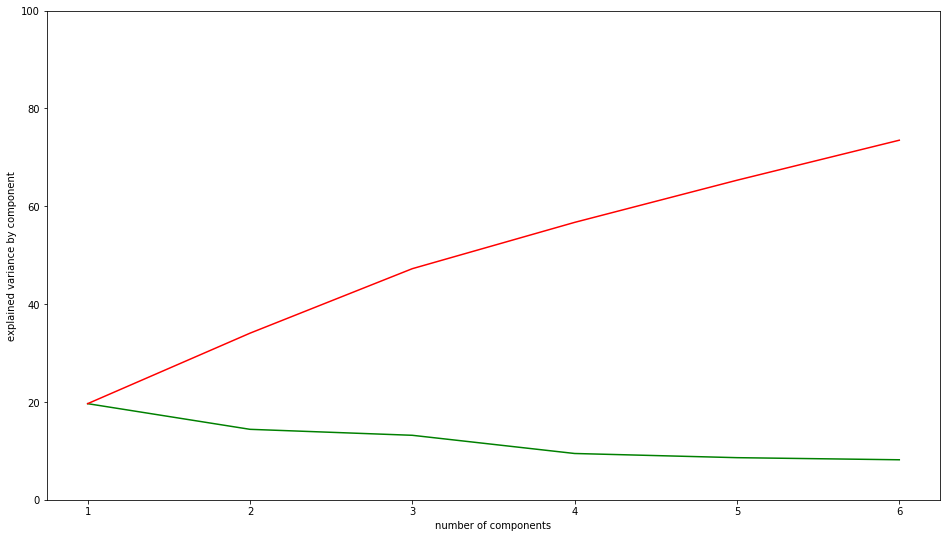

In [32]:
plt.figure(figsize=(16,9))
plt.plot(pca.explained_variance_ratio_*100, 'g')
plt.plot(np.cumsum(pca.explained_variance_ratio_*100), 'r')

plt.ylim(0,100)
plt.xlabel('number of components')
plt.ylabel('explained variance by component')
plt.xticks(np.arange(n), np.arange(1,n+1))
plt.show()

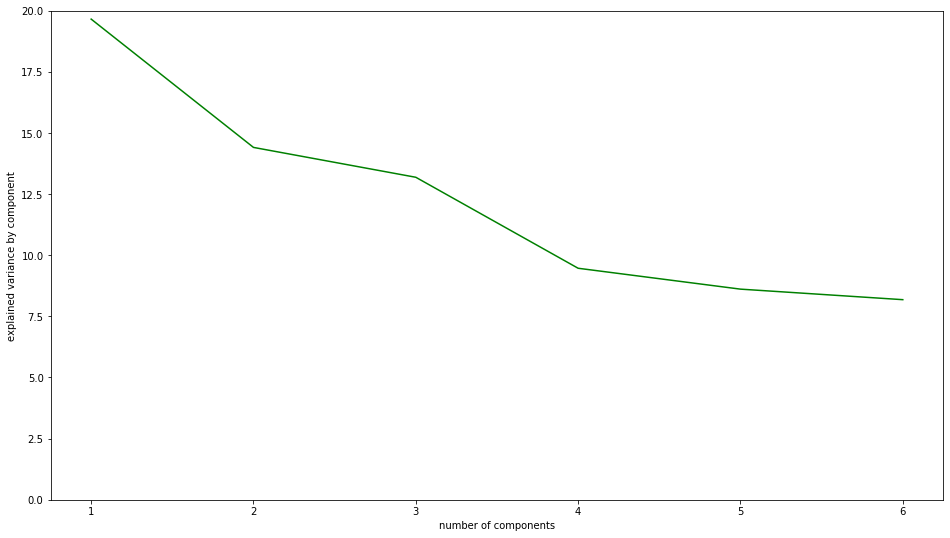

In [33]:
plt.figure(figsize=(16,9))
plt.plot(pca.explained_variance_ratio_*100, 'g')

plt.ylim(0,20)
plt.xlabel('number of components')
plt.ylabel('explained variance by component')
plt.xticks(np.arange(n), np.arange(1,n+1))
plt.show()

In [34]:
# principal_components = ['PC1', 'PC2', 'PC3', 'PC4', 'PC5', 'PC6', 'PC7', 'PC8']
# pca_df = pd.DataFrame(data=bikes_pca, columns=['PC1','PC'])

In [25]:
# plt.figure(figsize=(16,9))

# sns.scatterplot(x='PC1', y='PC2', data=pca_df)